In [2]:
import netCDF4 as nc

# 打开下载的nc文件
file_path = r'E:\Dataset\met_waves\202001_E39_C_Sulafjorden_wave.nc'  # 替换为你的nc文件路径
dataset = nc.Dataset(file_path, 'r')

# 输出文件的基本信息
print(f"文件名: {file_path}")
print(f"NetCDF版本: {dataset.file_format}")

# 输出文件中的维度（Dimensions）
dimensions = dataset.dimensions.keys()
print("\nDimensions:")
for dim in dimensions:
    print(f"  {dim}: {dataset.dimensions[dim].size}")

# 输出文件中的变量（Variables）
variables = dataset.variables.keys()
print("\nVariables:")
for var in variables:
    print(f"  {var}: {dataset.variables[var].dimensions}")
    print(f"    类型: {dataset.variables[var].datatype}")
    # 输出变量的属性（Attributes）
    attributes = dataset.variables[var].ncattrs()
    print(f"    属性:")
    for attr in attributes:
        print(f"      {attr}: {getattr(dataset.variables[var], attr)}")

# 关闭文件
dataset.close()

文件名: E:\Dataset\met_waves\202001_E39_C_Sulafjorden_wave.nc
NetCDF版本: NETCDF4

Dimensions:
  time: 4464

Variables:
  time: ('time',)
    类型: float64
    属性:
      standard_name: time
      long_name: Time of measurement
      units: seconds since 1970-01-01 00:00:00 UTC
      axis: T
      comment: End of the 10 minute sampling period
      calendar: standard
  latitude: ('time',)
    类型: float64
    属性:
      standard_name: latitude
      units: degree_north
      valid_min: -90.0
      valid_max: 90.0
  longitude: ('time',)
    类型: float64
    属性:
      standard_name: longitude
      units: degree_east
      valid_min: -180.0
      valid_max: 180.0
  Hm0: ('time',)
    类型: float32
    属性:
      _FillValue: 9999.0
      standard_name: sea_surface_wave_significant_height
      long_name: Significant wave height estimate from spectrum
      units: m
      valid_range: [ 0. 25.]
  hm0a: ('time',)
    类型: float32
    属性:
      _FillValue: 9999.0
      standard_name: sea_surface_wave_signi

In [3]:
import netCDF4 as nc
import numpy as np
from datetime import timedelta, datetime

# 打开NetCDF文件
file_path = r'E:\Dataset\met_waves\202001_E39_C_Sulafjorden_wave.nc'  # 请确保路径正确
dataset = nc.Dataset(file_path, 'r')

# 查找时间变量
time_var_name = None
for var_name in dataset.variables.keys():
    if 'time' in var_name.lower():  # 假设时间变量名中包含'time'
        time_var_name = var_name
        break

if time_var_name is None:
    raise ValueError("没有找到时间变量")

# 读取时间变量
time_var = dataset.variables[time_var_name]
time_units = time_var.getncattr('units')  # 获取时间单位
time_data = time_var[:]  # 读取时间数据

# 解析时间单位并转换为datetime对象（这取决于时间单位的格式）
# 假设时间单位是'hours since 0001-01-01 00:00:00.0'或类似的格式
# 这里我们使用numpy的datetime64功能来解析时间（注意：这可能需要根据实际的units字符串进行调整）
# 但是，对于NetCDF时间变量，通常使用netCDF4的num2date函数更为方便
from netCDF4 import num2date

# 获取时间数据的起始和结束索引
start_index = 0
end_index = len(time_data) - 1

# 将起始和结束时间从数值转换为datetime对象
start_time = num2date(time_data[start_index], units=time_units, calendar=time_var.calendar)
end_time = num2date(time_data[end_index], units=time_units, calendar=time_var.calendar)

# 输出时间跨度
time_span = end_time - start_time
print(f"时间跨度: {time_span}")

# 如果您想要以更易读的格式输出起始和结束时间
print(f"起始时间: {start_time}")
print(f"结束时间: {end_time}")

# 关闭NetCDF文件
dataset.close()

时间跨度: 30 days, 23:50:00
起始时间: 2020-01-01 00:00:00
结束时间: 2020-01-31 23:50:00


In [5]:
# 查找纬度和经度变量
lat_var_name = None
lon_var_name = None
for var_name in dataset.variables.keys():
    if 'latitude' in var_name.lower():  # 假设纬度变量名中包含'lat'
        lat_var_name = var_name
    elif 'longitude' in var_name.lower() or 'long' in var_name.lower():  # 假设经度变量名中包含'lon'或'long'
        lon_var_name = var_name

if lat_var_name is None or lon_var_name is None:
    raise ValueError("没有找到纬度或经度变量")

# 读取纬度和经度数据
lat_var = dataset.variables[lat_var_name]
lon_var = dataset.variables[lon_var_name]

# 获取纬度和经度的范围
lat_min = lat_var.min()
lat_max = lat_var.max()
lon_min = lon_var.min()
lon_max = lon_var.max()

# 输出经纬度范围
print(f"纬度范围: {lat_min}° 到 {lat_max}°")
print(f"经度范围: {lon_min}° 到 {lon_max}°")

# 关闭NetCDF文件
dataset.close()

AttributeError: NetCDF: Not a valid ID

In [6]:
import netCDF4 as nc

# 打开NetCDF文件
 # 请确保路径正确
try:
    dataset = nc.Dataset(file_path, 'r')
    print("可用的变量名:", dataset.variables.keys())  # 打印所有变量名

    # 查找纬度和经度变量
    lat_var_name = None
    lon_var_name = None
    for var_name in dataset.variables.keys():
        if 'lat' in var_name.lower():  # 假设纬度变量名中包含'lat'
            lat_var_name = var_name
        elif 'lon' in var_name.lower() or 'long' in var_name.lower():  # 假设经度变量名中包含'lon'或'long'
            lon_var_name = var_name

    if lat_var_name is None or lon_var_name is None:
        raise ValueError("没有找到纬度或经度变量")

    # 读取纬度和经度数据
    lat_var = dataset.variables[lat_var_name]
    lon_var = dataset.variables[lon_var_name]

    # 检查变量类型
    print("纬度变量类型:", type(lat_var))
    print("经度变量类型:", type(lon_var))

    # 尝试获取纬度和经度的范围（这里可能需要额外的错误处理）
    try:
        lat_min = lat_var[:].min()  # 注意这里的[:]用于获取数据数组
        lat_max = lat_var[:].max()
        lon_min = lon_var[:].min()
        lon_max = lon_var[:].max()

        # 输出经纬度范围
        print(f"纬度范围: {lat_min}° 到 {lat_max}°")
        print(f"经度范围: {lon_min}° 到 {lon_max}°")
    except Exception as e:
        print("在获取经纬度范围时出错:", e)

finally:
    # 关闭NetCDF文件
    dataset.close()

可用的变量名: dict_keys(['time', 'latitude', 'longitude', 'Hm0', 'hm0a', 'hm0b', 'hmax', 'tm02', 'tm02a', 'tm02b', 'tp', 'thmax', 'tm01', 'thhf', 'mdir', 'mdira', 'mdirb', 'thtp', 'sprtp'])
纬度变量类型: <class 'netCDF4._netCDF4.Variable'>
经度变量类型: <class 'netCDF4._netCDF4.Variable'>
纬度范围: 62.38923073° 到 62.39497185°
经度范围: 6.04452133° 到 6.05487823°


In [7]:
import netCDF4 as nc
# 打开下载的nc文件
file_path = r'E:\Dataset\met_waves\202001_E39_C1_Sulafjorden_wave.nc'  # 替换为你的nc文件路径
dataset = nc.Dataset(file_path, 'r')
# 打开NetCDF文件
 # 请确保路径正确
try:
    dataset = nc.Dataset(file_path, 'r')
    print("可用的变量名:", dataset.variables.keys())  # 打印所有变量名

    # 查找纬度和经度变量
    lat_var_name = None
    lon_var_name = None
    for var_name in dataset.variables.keys():
        if 'lat' in var_name.lower():  # 假设纬度变量名中包含'lat'
            lat_var_name = var_name
        elif 'lon' in var_name.lower() or 'long' in var_name.lower():  # 假设经度变量名中包含'lon'或'long'
            lon_var_name = var_name

    if lat_var_name is None or lon_var_name is None:
        raise ValueError("没有找到纬度或经度变量")

    # 读取纬度和经度数据
    lat_var = dataset.variables[lat_var_name]
    lon_var = dataset.variables[lon_var_name]

    # 检查变量类型
    print("纬度变量类型:", type(lat_var))
    print("经度变量类型:", type(lon_var))

    # 尝试获取纬度和经度的范围（这里可能需要额外的错误处理）
    try:
        lat_min = lat_var[:].min()  # 注意这里的[:]用于获取数据数组
        lat_max = lat_var[:].max()
        lon_min = lon_var[:].min()
        lon_max = lon_var[:].max()

        # 输出经纬度范围
        print(f"纬度范围: {lat_min}° 到 {lat_max}°")
        print(f"经度范围: {lon_min}° 到 {lon_max}°")
    except Exception as e:
        print("在获取经纬度范围时出错:", e)

finally:
    # 关闭NetCDF文件
    dataset.close()

可用的变量名: dict_keys(['time', 'latitude', 'longitude', 'Hm0', 'hm0a', 'hm0b', 'hmax', 'tm02', 'tm02a', 'tm02b', 'tp', 'thmax', 'tm01', 'thhf', 'mdir', 'mdira', 'mdirb', 'thtp', 'sprtp'])
纬度变量类型: <class 'netCDF4._netCDF4.Variable'>
经度变量类型: <class 'netCDF4._netCDF4.Variable'>
纬度范围: 62.39447594° 到 62.39890099°
经度范围: 6.0417366° 到 6.04974747°


In [7]:
import xarray as xr

# 打开NetCDF文件
ds = xr.open_dataset(r'E:\Dataset\met_waves\202001_E39_C_Sulafjorden_wave.nc')

# 获取纬度和经度
lat = ds['latitude'].values
lon = ds['longitude'].values

# 计算分辨率
lat_resolution = abs(lat[1] - lat[0])
lon_resolution = abs(lon[1] - lon[0])

print(f"纬度分辨率: {lat_resolution} 度")
print(f"经度分辨率: {lon_resolution} 度")


纬度分辨率: 9.540000000640703e-06 度
经度分辨率: 0.0001144400000008261 度


In [8]:

# 获取时间数据
time = ds['time']

# 计算时间差
time_diff = time.diff('time')

# 查看时间差的第一个值，即为时间分辨率
time_resolution = time_diff.mean().values

print(f"时间分辨率: {time_resolution}")


时间分辨率: 600000000000 nanoseconds


In [8]:
import netCDF4
import numpy as np

# 定义读取 NetCDF 文件并提取经纬度信息的函数
def get_grid_resolution(nc_file):
    # 打开 NetCDF 文件
    dataset = netCDF4.Dataset(nc_file, 'r')
    
    # 获取经纬度数据
    latitudes = dataset.variables['latitude'][:]
    longitudes = dataset.variables['longitude'][:]
    
    # 计算纬度和经度的最小值、最大值和间隔
    lat_min, lat_max = np.min(latitudes), np.max(latitudes)
    lon_min, lon_max = np.min(longitudes), np.max(longitudes)
    
    lat_res = latitudes[1] - latitudes[0]  # 纬度分辨率
    lon_res = longitudes[1] - longitudes[0]  # 经度分辨率
    
    # 输出结果
    print(f"Latitude Range: {lat_min} to {lat_max}")
    print(f"Longitude Range: {lon_min} to {lon_max}")
    print(f"Latitude Resolution: {lat_res} degrees")
    print(f"Longitude Resolution: {lon_res} degrees")
    
    return lat_res, lon_res

# 你的 NetCDF 文件路径
nc_file = r'E:\Dataset\met_waves\202001_E39_C_Sulafjorden_wave.nc'  # 修改为你的文件路径

# 获取并打印网格分辨率
get_grid_resolution(nc_file)


Latitude Range: 62.38923073 to 62.39497185
Longitude Range: 6.04452133 to 6.05487823
Latitude Resolution: 9.540000000640703e-06 degrees
Longitude Resolution: 0.0001144400000008261 degrees


(9.540000000640703e-06, 0.0001144400000008261)

In [9]:
import numpy as np

# 地球半径：111公里，换算成米
earth_radius = 6371  # 地球半径（单位：km）
lat_res_target = 250 / 111000  # 纬度分辨率，单位度
latitude = 62.3  # 假设的纬度（单位：度）

# 计算经度的分辨率
lon_res_target = 250 / (111000 * np.cos(np.radians(latitude)))  # 经度分辨率，单位度

print(f"Target Latitude Resolution: {lat_res_target} degrees")
print(f"Target Longitude Resolution: {lon_res_target} degrees")


Target Latitude Resolution: 0.0022522522522522522 degrees
Target Longitude Resolution: 0.004845199079918266 degrees


In [13]:
import netCDF4

# 打开 NetCDF 文件
nc_file = r'E:\Dataset\met_waves\202001_E39_C_Sulafjorden_wave.nc'
dataset = netCDF4.Dataset(nc_file, 'r')

# 获取纬度和经度的数据
latitudes = dataset.variables['latitude'][:]
longitudes = dataset.variables['longitude'][:]

# 获取纬度和经度的网格数
num_latitude = len(latitudes)
num_longitude = len(longitudes)

# 输出网格数
total_grids = num_latitude * num_longitude
print(f"Total number of grids: {total_grids} (Latitude: {num_latitude}, Longitude: {num_longitude})")


Total number of grids: 19927296 (Latitude: 4464, Longitude: 4464)


C:\Users\86156\AppData\Local\Temp\ipykernel_23464\1275167684.py:31: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  interp_func = interpolate.interp2d(longitudes, latitudes, original_data, kind='linear', fill_value='extrapolate')
D:\CondaEnvs\torchtmp\lib\site-packages\scipy\interpolate\_fitpack_impl.py:975: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=71,67 m=4464 fp=7.705

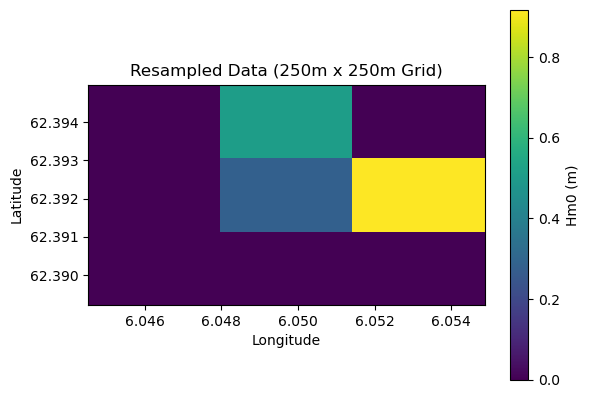

In [12]:
import netCDF4
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

# 打开NetCDF文件
nc_file = r'E:\Dataset\met_waves\202001_E39_C_Sulafjorden_wave.nc'  # 修改为你的文件路径

dataset = netCDF4.Dataset(nc_file, 'r')

# 获取经纬度数据
latitudes = dataset.variables['latitude'][:]
longitudes = dataset.variables['longitude'][:]

# 假设你有某个变量需要重新网格化，比如 'Hm0'（有效波高）
original_data = dataset.variables['Hm0'][:]

# 计算新网格的维度
lat_min, lat_max = np.min(latitudes), np.max(latitudes)
lon_min, lon_max = np.min(longitudes), np.max(longitudes)

# 根据目标分辨率计算新网格的纬度和经度
new_lat_res = 250 / 111000  # 新的纬度分辨率
new_lon_res = 250 / (111000 * np.cos(np.radians(np.mean(latitudes))))  # 新的经度分辨率

# 计算新网格的经纬度范围
new_latitudes = np.arange(lat_min, lat_max, new_lat_res)
new_longitudes = np.arange(lon_min, lon_max, new_lon_res)

# 使用插值函数将数据从原始网格转换为新网格
interp_func = interpolate.interp2d(longitudes, latitudes, original_data, kind='linear', fill_value='extrapolate')
new_data = interp_func(new_longitudes, new_latitudes)

# 可视化结果
plt.imshow(new_data, extent=(lon_min, lon_max, lat_min, lat_max), origin='lower')
plt.colorbar(label='Hm0 (m)')
plt.title('Resampled Data (250m x 250m Grid)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


C:\Users\86156\AppData\Local\Temp\ipykernel_23464\3540075873.py:37: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  interp_func = interpolate.interp2d(original_lon, original_lat, original_data, kind='linear', fill_value=np.nan)
D:\CondaEnvs\torchtmp\lib\site-packages\scipy\interpolate\_fitpack_impl.py:975: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=71,67 m=4464 fp=7.70522

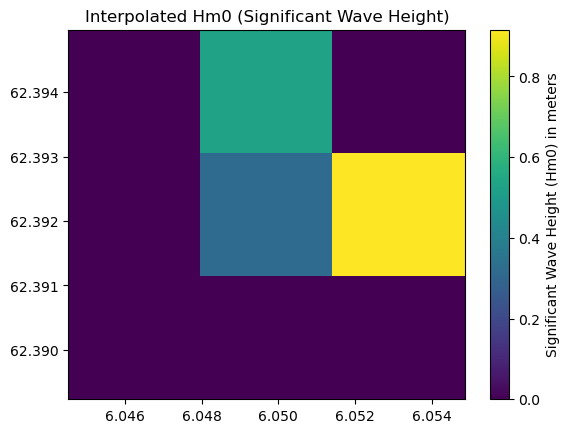

In [14]:
import numpy as np
import xarray as xr
import netCDF4
from scipy import interpolate
import matplotlib.pyplot as plt

# 打开 NetCDF 文件
# nc_file = '/path/to/your/file.nc'
dataset = netCDF4.Dataset(nc_file, 'r')

# 获取原始数据
latitude = dataset.variables['latitude'][:]
longitude = dataset.variables['longitude'][:]
Hm0 = dataset.variables['Hm0'][:]
tm02 = dataset.variables['tm02'][:]
mdir = dataset.variables['mdir'][:]

# 获取原始经纬度网格
lat_min, lat_max = np.min(latitude), np.max(latitude)
lon_min, lon_max = np.min(longitude), np.max(longitude)

# 原始经纬度分辨率（假设从数据中获取）
lat_res = (lat_max - lat_min) / (len(latitude) - 1)
lon_res = (lon_max - lon_min) / (len(longitude) - 1)

# 计算目标经纬度网格（250米对应的度数）
target_lat_res = 250 / 111320  # 转换为度数 (1度大约等于 111320 米)
target_lon_res = 250 / (111320 * np.cos(np.deg2rad(np.mean(latitude))))  # 考虑经度的变化

# 生成目标经纬度网格
target_lat = np.arange(lat_min, lat_max, target_lat_res)
target_lon = np.arange(lon_min, lon_max, target_lon_res)

# 创建插值函数
def interpolate_data(original_lat, original_lon, original_data, target_lat, target_lon):
    # 使用scipy的2D插值
    interp_func = interpolate.interp2d(original_lon, original_lat, original_data, kind='linear', fill_value=np.nan)
    return interp_func(target_lon, target_lat)

# 对每个变量进行插值
Hm0_interp = interpolate_data(latitude, longitude, Hm0, target_lat, target_lon)
tm02_interp = interpolate_data(latitude, longitude, tm02, target_lat, target_lon)
mdir_interp = interpolate_data(latitude, longitude, mdir, target_lat, target_lon)

# 创建xarray DataArray，方便保存和后续操作
interp_data = xr.Dataset(
    {
        'Hm0': (['lat', 'lon'], Hm0_interp),
        'tm02': (['lat', 'lon'], tm02_interp),
        'mdir': (['lat', 'lon'], mdir_interp),
    },
    coords={
        'lat': target_lat,
        'lon': target_lon
    }
)

# 保存插值结果到新的 NetCDF 文件
interp_data.to_netcdf('E:\Dataset\met_waves\modifiedData\interpolated_data.nc')

# 可选：显示插值后的数据（例如 Hm0）
plt.imshow(Hm0_interp, extent=(lon_min, lon_max, lat_min, lat_max), origin='lower', aspect='auto')
plt.colorbar(label="Significant Wave Height (Hm0) in meters")
plt.title("Interpolated Hm0 (Significant Wave Height)")
plt.show()



In [16]:
import netCDF4

# 打开 NetCDF 文件
nc_file = r'E:\Dataset\met_waves\modifiedData\interpolated_data.nc'
dataset = netCDF4.Dataset(nc_file, 'r')

# 查看所有变量的名称
print(dataset.variables.keys())


dict_keys(['Hm0', 'tm02', 'mdir', 'lat', 'lon'])


In [17]:
import netCDF4

# 打开 NetCDF 文件
nc_file = r'E:\Dataset\met_waves\modifiedData\interpolated_data.nc'
dataset = netCDF4.Dataset(nc_file, 'r')

# 获取纬度和经度的数据
latitudes = dataset.variables['lat'][:]
longitudes = dataset.variables['lon'][:]

# 获取纬度和经度的网格数
num_latitude = len(latitudes)
num_longitude = len(longitudes)

# 输出网格数
total_grids = num_latitude * num_longitude
print(f"Total number of grids: {total_grids} (Latitude: {num_latitude}, Longitude: {num_longitude})")


Total number of grids: 9 (Latitude: 3, Longitude: 3)


In [7]:
import netCDF4 as nc

# 文件路径
file_path = "E:\Dataset\met_waves\swan\swanSula201701.nc"  # 替换为你的文件路径

# 读取 NetCDF 文件
with nc.Dataset(file_path, mode='r') as dataset:
    # 打印所有变量的键值
    print("所有键值：")
    for key in dataset.variables.keys():
        print(key)

    # 打印时间范围
    time_var = dataset.variables['time']  # 假设时间变量名为 'time'
    time_units = time_var.units
    time_values = nc.num2date(time_var[:], units=time_units)
    print("\n时间范围：")
    print(f"开始时间: {time_values[0]}")
    print(f"结束时间: {time_values[-1]}")

    # 打印经纬度范围
    lat = dataset.variables['latitude']  # 假设纬度变量名为 'latitude'
    lon = dataset.variables['longitude']  # 假设经度变量名为 'longitude'
    print("\n纬度范围：")
    print(f"最小纬度: {lat[:].min()}, 最大纬度: {lat[:].max()}")
    print("\n经度范围：")
    print(f"最小经度: {lon[:].min()}, 最大经度: {lon[:].max()}")


所有键值：
hs
latitude
longitude
theta0
thetap
time
tm01
tm02
tp
tps
xwnd
ywnd

时间范围：
开始时间: 2017-01-01 00:00:00
结束时间: 2017-01-31 23:00:00

纬度范围：
最小纬度: 62.06999969482422, 最大纬度: 62.5672492980957

经度范围：
最小经度: 5.380000114440918, 最大经度: 6.733150005340576


In [3]:
# 读取 NetCDF 文件
with nc.Dataset(file_path, mode='r') as dataset:
    print("NetCDF 文件变量详细信息：\n")
    
    # 遍历所有变量
    for var_name, variable in dataset.variables.items():
        print(f"变量名: {var_name}")
        print(f"  维度: {variable.dimensions}")
        print(f"  数据类型: {variable.dtype}")
        
        # 打印变量的属性
        print(f"  属性:")
        for attr_name in variable.ncattrs():
            attr_value = getattr(variable, attr_name)
            print(f"    {attr_name}: {attr_value}")
        
        print("-" * 50)  # 分隔符

NetCDF 文件变量详细信息：

变量名: hs
  维度: ('time', 'latitude', 'longitude')
  数据类型: int16
  属性:
    units: m
    standard_name: sea_surface_wave_significant_height
    long_name: hs
    scale_factor: 0.0007629627361893654
    add_offset: 25.0
    _FillValue: -32768
--------------------------------------------------
变量名: latitude
  维度: ('latitude',)
  数据类型: float32
  属性:
    units: degrees_north
    long_name: latitude
    standard_name: latitude
--------------------------------------------------
变量名: longitude
  维度: ('longitude',)
  数据类型: float32
  属性:
    units: degrees_east
    long_name: longitude
    standard_name: longitude
--------------------------------------------------
变量名: theta0
  维度: ('time', 'latitude', 'longitude')
  数据类型: int16
  属性:
    units: degrees
    standard_name: sea_surface_wave_from_direction
    long_name: theta0
    scale_factor: 0.005493331700563431
    add_offset: 180.0
    _FillValue: -32768
--------------------------------------------------
变量名: thetap
  维度: ('tim

In [8]:
# 读取 NetCDF 文件
with nc.Dataset(file_path, mode='r') as dataset:
    # 打印时间分辨率
    time_var = dataset.variables['time']  # 假设时间变量名为 'time'
    time_units = time_var.units
    time_values = nc.num2date(time_var[:], units=time_units)
    if len(time_values) > 1:
        time_resolution = (time_values[1] - time_values[0]).total_seconds()
        print(f"时间分辨率: {time_resolution / 3600} 小时")
    else:
        print("时间分辨率: 数据不足以计算时间分辨率")

    # 打印纬度分辨率
    lat = dataset.variables['latitude']  # 假设纬度变量名为 'latitude'
    if len(lat) > 1:
        lat_resolution = np.abs(lat[1] - lat[0])
        print(f"纬度分辨率: {lat_resolution} 度")
    else:
        print("纬度分辨率: 数据不足以计算纬度分辨率")

    # 打印经度分辨率
    lon = dataset.variables['longitude']  # 假设经度变量名为 'longitude'
    if len(lon) > 1:
        lon_resolution = np.abs(lon[1] - lon[0])
        print(f"经度分辨率: {lon_resolution} 度")
    else:
        print("经度分辨率: 数据不足以计算经度分辨率")


时间分辨率: 1.0 小时
纬度分辨率: 0.00225067138671875 度
经度分辨率: 0.004849910736083984 度


In [12]:
file_path = "E:\Dataset\met_waves\swan\swanSula201701.nc"  # 替换为你的文件路径
# 读取 NetCDF 文件
with nc.Dataset(file_path, mode='r') as dataset:
    # 获取纬度和经度维度的长度
    lat = dataset.variables['latitude']  # 假设纬度变量名为 'latitude'
    lon = dataset.variables['longitude']  # 假设经度变量名为 'longitude'
    num_lat = len(lat)
    num_lon = len(lon)

    # 打印纬度和经度网格数量
    print(f"纬度网格点数: {num_lat}")
    print(f"经度网格点数: {num_lon}")

    # 总网格数量（空间）
    total_spatial_grids = num_lat * num_lon
    print(f"空间总网格点数: {total_spatial_grids}")

    # 如果有时间维度，考虑时间网格
    if 'time' in dataset.variables:
        time = dataset.variables['time']
        num_time = len(time)
        total_grids = total_spatial_grids * num_time
        print(f"时间维度网格点数: {num_time}")
        print(f"总网格点数（时间 + 空间）: {total_grids}")
    else:
        print(f"文件中无时间维度")


纬度网格点数: 222
经度网格点数: 280
空间总网格点数: 62160
时间维度网格点数: 744
总网格点数（时间 + 空间）: 46247040


In [13]:
import netCDF4 as nc
import numpy as np

# 原始文件路径
input_file = "E:\Dataset\met_waves\swan\swanSula201701.nc"  # 替换为你的文件路径
# 输出文件路径
output_file = "E:\Dataset\met_waves\Swan_cropped\swanSula201701.nc"

# 定义裁剪的经纬度范围
lon_min, lon_max = 5.6, 6.2
lat_min, lat_max = 62.2, 62.5

# 打开原始文件
with nc.Dataset(input_file, mode='r') as src:
    # 获取变量和维度数据
    lons = src.variables['longitude'][:]
    lats = src.variables['latitude'][:]
    
    # 找到符合裁剪条件的索引
    lon_idx = np.where((lons >= lon_min) & (lons <= lon_max))[0]
    lat_idx = np.where((lats >= lat_min) & (lats <= lat_max))[0]
    
    # 获取需要裁剪的经纬度范围
    cropped_lons = lons[lon_idx]
    cropped_lats = lats[lat_idx]

    # 提取目标变量的数据
    hs_data = src.variables['hs'][:, lat_idx, lon_idx]  # 假设 hs 的维度是 (time, lat, lon)
    tm02_data = src.variables['tm02'][:, lat_idx, lon_idx]  # 假设 tm02 的维度相同
    theta0_data = src.variables['theta0'][:, lat_idx, lon_idx]  # 假设 theta0 的维度相同

    # 时间变量（如果有时间维度）
    if 'time' in src.variables:
        time_data = src.variables['time'][:]
        time_units = src.variables['time'].units
        time_calendar = src.variables['time'].calendar

# 创建新的裁剪后的文件
with nc.Dataset(output_file, mode='w', format='NETCDF4') as dst:
    # 定义维度
    if 'time' in src.variables:
        dst.createDimension('time', None)  # 可变时间维度
    dst.createDimension('latitude', len(cropped_lats))
    dst.createDimension('longitude', len(cropped_lons))
    
    # 创建并写入变量
    # 时间
    if 'time' in src.variables:
        time_var = dst.createVariable('time', 'f8', ('time',))
        time_var[:] = time_data
        time_var.units = time_units
        time_var.calendar = time_calendar
    
    # 纬度
    lat_var = dst.createVariable('latitude', 'f4', ('latitude',))
    lat_var[:] = cropped_lats
    lat_var.units = 'degrees_north'

    # 经度
    lon_var = dst.createVariable('longitude', 'f4', ('longitude',))
    lon_var[:] = cropped_lons
    lon_var.units = 'degrees_east'
    
    # hs
    hs_var = dst.createVariable('hs', 'f4', ('time', 'latitude', 'longitude'))
    hs_var[:] = hs_data
    hs_var.units = 'meters'
    hs_var.long_name = 'Significant Wave Height'
    
    # tm
    tm_var = dst.createVariable('tm', 'f4', ('time', 'latitude', 'longitude'))
    tm_var[:] = tm02_data
    tm_var.units = 'seconds'
    tm_var.long_name = 'Mean Wave Period'
    
    # dirm
    dirm_var = dst.createVariable('dirm', 'f4', ('time', 'latitude', 'longitude'))
    dirm_var[:] = theta0_data
    dirm_var.units = 'degrees'
    dirm_var.long_name = 'Mean Wave Direction'

print(f"裁剪完成，新文件已保存到: {output_file}")


裁剪完成，新文件已保存到: E:\Dataset\met_waves\Swan_cropped\swanSula201701.nc


In [14]:
file_path = "E:\Dataset\met_waves\Swan_cropped\swanSula201701.nc"
# 读取 NetCDF 文件
with nc.Dataset(file_path, mode='r') as dataset:
    # 获取纬度和经度维度的长度
    lat = dataset.variables['latitude']  # 假设纬度变量名为 'latitude'
    lon = dataset.variables['longitude']  # 假设经度变量名为 'longitude'
    num_lat = len(lat)
    num_lon = len(lon)

    # 打印纬度和经度网格数量
    print(f"纬度网格点数: {num_lat}")
    print(f"经度网格点数: {num_lon}")

    # 总网格数量（空间）
    total_spatial_grids = num_lat * num_lon
    print(f"空间总网格点数: {total_spatial_grids}")

    # 如果有时间维度，考虑时间网格
    if 'time' in dataset.variables:
        time = dataset.variables['time']
        num_time = len(time)
        total_grids = total_spatial_grids * num_time
        print(f"时间维度网格点数: {num_time}")
        print(f"总网格点数（时间 + 空间）: {total_grids}")
    else:
        print(f"文件中无时间维度")


纬度网格点数: 134
经度网格点数: 124
空间总网格点数: 16616
时间维度网格点数: 744
总网格点数（时间 + 空间）: 12362304


In [15]:
import netCDF4 as nc
import numpy as np

# 原始文件路径
input_file = "E:\Dataset\met_waves\swan\swanSula201701.nc"  # 替换为你的文件路径
# 输出文件路径
output_file = "E:\Dataset\met_waves\Swan_cropped\swanSula2017012.nc"

# 定义裁剪的经纬度范围 (大致)
lon_min, lon_max = 5.6, 6.2
lat_min, lat_max = 62.2, 62.5

# 打开原始文件
with nc.Dataset(input_file, mode='r') as src:
    # 获取变量和维度数据
    lons = src.variables['longitude'][:]
    lats = src.variables['latitude'][:]
    
    # 当前经纬度范围的网格点数
    current_lon_idx = np.where((lons >= lon_min) & (lons <= lon_max))[0]
    current_lat_idx = np.where((lats >= lat_min) & (lats <= lat_max))[0]
    
    # 获取当前裁剪区域的经纬度范围
    current_cropped_lons = lons[current_lon_idx]
    current_cropped_lats = lats[current_lat_idx]
    
    # 计算当前经纬度范围的步长
    lon_step = (current_cropped_lons[-1] - current_cropped_lons[0]) / (len(current_cropped_lons) - 1)
    lat_step = (current_cropped_lats[-1] - current_cropped_lats[0]) / (len(current_cropped_lats) - 1)
    
    # 目标网格点数
    target_grid_points = 128

    # 重新计算裁剪区域的经纬度范围
    new_lon_min = current_cropped_lons[0]  # 保持左边界不变
    new_lon_max = new_lon_min + lon_step * (target_grid_points - 1)
    
    new_lat_min = current_cropped_lats[0]  # 保持下边界不变
    new_lat_max = new_lat_min + lat_step * (target_grid_points - 1)
    
    # 找到新的经纬度索引
    new_lon_idx = np.where((lons >= new_lon_min) & (lons <= new_lon_max))[0]
    new_lat_idx = np.where((lats >= new_lat_min) & (lats <= new_lat_max))[0]
    
    # 获取裁剪后的经纬度数据
    cropped_lons = lons[new_lon_idx]
    cropped_lats = lats[new_lat_idx]

    # 提取目标变量的数据
    hs_data = src.variables['hs'][:, new_lat_idx, new_lon_idx]
    tm02_data = src.variables['tm02'][:, new_lat_idx, new_lon_idx]
    theta0_data = src.variables['theta0'][:, new_lat_idx, new_lon_idx]

    # 时间变量（如果有时间维度）
    if 'time' in src.variables:
        time_data = src.variables['time'][:]
        time_units = src.variables['time'].units
        time_calendar = src.variables['time'].calendar

# 创建新的裁剪后的文件
with nc.Dataset(output_file, mode='w', format='NETCDF4') as dst:
    # 定义维度
    if 'time' in src.variables:
        dst.createDimension('time', None)  # 可变时间维度
    dst.createDimension('latitude', len(cropped_lats))
    dst.createDimension('longitude', len(cropped_lons))
    
    # 创建并写入变量
    # 时间
    if 'time' in src.variables:
        time_var = dst.createVariable('time', 'f8', ('time',))
        time_var[:] = time_data
        time_var.units = time_units
        time_var.calendar = time_calendar
    
    # 纬度
    lat_var = dst.createVariable('latitude', 'f4', ('latitude',))
    lat_var[:] = cropped_lats
    lat_var.units = 'degrees_north'

    # 经度
    lon_var = dst.createVariable('longitude', 'f4', ('longitude',))
    lon_var[:] = cropped_lons
    lon_var.units = 'degrees_east'
    
    # hs
    hs_var = dst.createVariable('hs', 'f4', ('time', 'latitude', 'longitude'))
    hs_var[:] = hs_data
    hs_var.units = 'meters'
    hs_var.long_name = 'Significant Wave Height'
    
    # tm
    tm_var = dst.createVariable('tm', 'f4', ('time', 'latitude', 'longitude'))
    tm_var[:] = tm02_data
    tm_var.units = 'seconds'
    tm_var.long_name = 'Mean Wave Period'
    
    # dirm
    dirm_var = dst.createVariable('dirm', 'f4', ('time', 'latitude', 'longitude'))
    dirm_var[:] = theta0_data
    dirm_var.units = 'degrees'
    dirm_var.long_name = 'Mean Wave Direction'

print(f"裁剪完成并调整为128网格，新文件已保存到: {output_file}")


裁剪完成并调整为128网格，新文件已保存到: E:\Dataset\met_waves\Swan_cropped\swanSula2017012.nc


In [16]:
file_path = "E:\Dataset\met_waves\Swan_cropped\swanSula2017012.nc"
# 读取 NetCDF 文件
with nc.Dataset(file_path, mode='r') as dataset:
    # 获取纬度和经度维度的长度
    lat = dataset.variables['latitude']  # 假设纬度变量名为 'latitude'
    lon = dataset.variables['longitude']  # 假设经度变量名为 'longitude'
    num_lat = len(lat)
    num_lon = len(lon)

    # 打印纬度和经度网格数量
    print(f"纬度网格点数: {num_lat}")
    print(f"经度网格点数: {num_lon}")

    # 总网格数量（空间）
    total_spatial_grids = num_lat * num_lon
    print(f"空间总网格点数: {total_spatial_grids}")

    # 如果有时间维度，考虑时间网格
    if 'time' in dataset.variables:
        time = dataset.variables['time']
        num_time = len(time)
        total_grids = total_spatial_grids * num_time
        print(f"时间维度网格点数: {num_time}")
        print(f"总网格点数（时间 + 空间）: {total_grids}")
    else:
        print(f"文件中无时间维度")


纬度网格点数: 128
经度网格点数: 128
空间总网格点数: 16384
时间维度网格点数: 744
总网格点数（时间 + 空间）: 12189696


In [17]:
import netCDF4 as nc

# 文件路径
file_path = "E:\Dataset\met_waves\Swan_cropped\swanSula2017012.nc"

# 读取 NetCDF 文件
with nc.Dataset(file_path, mode='r') as dataset:
    # 打印所有变量的键值
    print("所有键值：")
    for key in dataset.variables.keys():
        print(key)

    # 打印时间范围
    time_var = dataset.variables['time']  # 假设时间变量名为 'time'
    time_units = time_var.units
    time_values = nc.num2date(time_var[:], units=time_units)
    print("\n时间范围：")
    print(f"开始时间: {time_values[0]}")
    print(f"结束时间: {time_values[-1]}")

    # 打印经纬度范围
    lat = dataset.variables['latitude']  # 假设纬度变量名为 'latitude'
    lon = dataset.variables['longitude']  # 假设经度变量名为 'longitude'
    print("\n纬度范围：")
    print(f"最小纬度: {lat[:].min()}, 最大纬度: {lat[:].max()}")
    print("\n经度范围：")
    print(f"最小经度: {lon[:].min()}, 最大经度: {lon[:].max()}")


所有键值：
time
latitude
longitude
hs
tm
dirm

时间范围：
开始时间: 2017-01-01 00:00:00
结束时间: 2017-01-31 23:00:00

纬度范围：
最小纬度: 62.20050048828125, 最大纬度: 62.48624801635742

经度范围：
最小经度: 5.603100299835205, 最大经度: 6.219050407409668


In [18]:
import netCDF4 as nc

# 文件路径
file_path = "E:\Dataset\met_waves\Swan_cropped\swanSula201702_cropped.nc"

# 读取 NetCDF 文件
with nc.Dataset(file_path, mode='r') as dataset:
    # 打印所有变量的键值
    print("所有键值：")
    for key in dataset.variables.keys():
        print(key)

    # 打印时间范围
    time_var = dataset.variables['time']  # 假设时间变量名为 'time'
    time_units = time_var.units
    time_values = nc.num2date(time_var[:], units=time_units)
    print("\n时间范围：")
    print(f"开始时间: {time_values[0]}")
    print(f"结束时间: {time_values[-1]}")

    # 打印经纬度范围
    lat = dataset.variables['latitude']  # 假设纬度变量名为 'latitude'
    lon = dataset.variables['longitude']  # 假设经度变量名为 'longitude'
    print("\n纬度范围：")
    print(f"最小纬度: {lat[:].min()}, 最大纬度: {lat[:].max()}")
    print("\n经度范围：")
    print(f"最小经度: {lon[:].min()}, 最大经度: {lon[:].max()}")


所有键值：
time
latitude
longitude
hs
tm
dirm

时间范围：
开始时间: 2017-02-01 00:00:00
结束时间: 2017-02-28 23:00:00

纬度范围：
最小纬度: 62.20050048828125, 最大纬度: 62.48624801635742

经度范围：
最小经度: 5.603100299835205, 最大经度: 6.219050407409668


In [19]:
# 读取 NetCDF 文件
with nc.Dataset(file_path, mode='r') as dataset:
    print("NetCDF 文件变量详细信息：\n")
    
    # 遍历所有变量
    for var_name, variable in dataset.variables.items():
        print(f"变量名: {var_name}")
        print(f"  维度: {variable.dimensions}")
        print(f"  数据类型: {variable.dtype}")
        
        # 打印变量的属性
        print(f"  属性:")
        for attr_name in variable.ncattrs():
            attr_value = getattr(variable, attr_name)
            print(f"    {attr_name}: {attr_value}")
        
        print("-" * 50)  # 分隔符

NetCDF 文件变量详细信息：

变量名: time
  维度: ('time',)
  数据类型: float64
  属性:
    units: seconds since 1970-01-01
    calendar: gregorian
--------------------------------------------------
变量名: latitude
  维度: ('latitude',)
  数据类型: float32
  属性:
    units: degrees_north
--------------------------------------------------
变量名: longitude
  维度: ('longitude',)
  数据类型: float32
  属性:
    units: degrees_east
--------------------------------------------------
变量名: hs
  维度: ('time', 'latitude', 'longitude')
  数据类型: float32
  属性:
    units: meters
    long_name: Significant Wave Height
--------------------------------------------------
变量名: tm
  维度: ('time', 'latitude', 'longitude')
  数据类型: float32
  属性:
    units: seconds
    long_name: Mean Wave Period
--------------------------------------------------
变量名: dirm
  维度: ('time', 'latitude', 'longitude')
  数据类型: float32
  属性:
    units: degrees
    long_name: Mean Wave Direction
--------------------------------------------------


In [1]:
import xarray as xr

def print_nc_time_points_xr(file_path):
    """
    打印 .nc 文件中的每个时间点。
    
    参数:
        file_path: str，.nc 文件路径。
    """
    # 打开 .nc 文件
    ds = xr.open_dataset(file_path)
    
    # 假设时间变量名为 'time'，根据实际变量名调整
    if 'time' in ds:
        time_points = ds['time'].values
        print("时间点:")
        for i, time in enumerate(time_points):
            print(f"索引 {i}: {time}")
    else:
        print("未找到 'time' 变量，请检查 .nc 文件变量名。")
    
    # 关闭文件（可选）
    ds.close()

# 示例用法
file_path = r'E:\Dataset\met_waves\buoy\201807_E39_C_Sulafjorden_wave.nc'
print_nc_time_points_xr(file_path)


时间点:
索引 0: 2018-07-01T00:00:00.000000000
索引 1: 2018-07-01T00:10:00.000000000
索引 2: 2018-07-01T00:20:00.000000000
索引 3: 2018-07-01T00:30:00.000000000
索引 4: 2018-07-01T00:40:00.000000000
索引 5: 2018-07-01T00:50:00.000000000
索引 6: 2018-07-01T01:00:00.000000000
索引 7: 2018-07-01T01:10:00.000000000
索引 8: 2018-07-01T01:20:00.000000000
索引 9: 2018-07-01T01:30:00.000000000
索引 10: 2018-07-01T01:40:00.000000000
索引 11: 2018-07-01T01:50:00.000000000
索引 12: 2018-07-01T02:00:00.000000000
索引 13: 2018-07-01T02:10:00.000000000
索引 14: 2018-07-01T02:20:00.000000000
索引 15: 2018-07-01T02:30:00.000000000
索引 16: 2018-07-01T02:40:00.000000000
索引 17: 2018-07-01T02:50:00.000000000
索引 18: 2018-07-01T03:00:00.000000000
索引 19: 2018-07-01T03:10:00.000000000
索引 20: 2018-07-01T03:20:00.000000000
索引 21: 2018-07-01T03:30:00.000000000
索引 22: 2018-07-01T03:40:00.000000000
索引 23: 2018-07-01T03:50:00.000000000
索引 24: 2018-07-01T04:00:00.000000000
索引 25: 2018-07-01T04:10:00.000000000
索引 26: 2018-07-01T04:20:00.000000000
索引 27:

In [5]:
import xarray as xr
import pandas as pd
def find_time_gaps_xr(file_path, time_var_name='time', expected_gap=10):
    """
    找出 .nc 文件中时间点间隔不是 10 分钟的记录。
    
    参数:
        file_path: str，.nc 文件路径。
        time_var_name: str，时间变量的名称，默认为 'time'。
        expected_gap: int，期望的时间间隔（单位：分钟）。
    
    返回:
        gaps: list，包含间隔异常的时间点对 [(上一个时间点, 当前时间点), ...]。
    """
    # 打开 .nc 文件
    ds = xr.open_dataset(file_path)
    
    if time_var_name not in ds:
        raise ValueError(f"未找到时间变量 '{time_var_name}'")
    
    # 提取时间点
    time_points = ds[time_var_name].values
    time_points = pd.to_datetime(time_points)  # 转为 pandas 时间对象
    
    # 查找时间间隔异常
    gaps = []
    for i in range(1, len(time_points)):
        # 计算时间差（分钟）
        time_diff = (time_points[i] - time_points[i - 1]).total_seconds() / 60
        if time_diff != expected_gap:
            gaps.append((time_points[i - 1], time_points[i]))
    
    # 关闭文件
    ds.close()
    
    return gaps

# 示例用法

gaps = find_time_gaps_xr(file_path)
print("时间间隔异常的时间点对:")
for prev, curr in gaps:
    print(f"上一个时间点: {prev}, 当前时间点: {curr}")


时间间隔异常的时间点对:
上一个时间点: 2018-07-05 21:50:00, 当前时间点: 2018-07-08 12:00:00
